# 1. Take user input for a stock

In [1]:
import json
import pandas as pd
import json
import requests
import sys
import matplotlib.pyplot as plt

# Take user input for a stock (Ticker Symbol)
ticker_symbol=input()

AAPL


# 2. Display back to the user

Ticker Name, Full Name of the Stock, Current Market
Price, Target Mean Price, 52 week high and 52 week low. Also, output 5 of the current
trending stock.

In [2]:
apikey="JBnCf7h1MV9k8bSZ85wQraKnTfcImmpcFpAYI6Ph"

url1 = "https://yfapi.net/v6/finance/quote"
url2 = "https://yfapi.net/v11/finance/quoteSummary/" + ticker_symbol
url3 = "https://yfapi.net/v1/finance/trending/US"

querystring = {"symbols": ticker_symbol}

querystring2 = {"symbols": ticker_symbol,
                "modules": "financialData"}

querystring3 = {"region": "US"}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url1, headers=headers, params=querystring)
response2 = requests.request("GET", url2, headers=headers, params=querystring2)
response3 = requests.request("GET", url3, headers=headers, params=querystring3)

stock_json = response.json()
stock_json2 = response2.json()
stock_json3 = response3.json()

In [3]:
# Error Handling
if response.status_code == 200:
    if response.text == '{"quoteResponse":{"result":[],"error":null}}':
        print("Please try again with a valid ticker symbol.")
        sys.exit()
    else:
        print("Request was successful!:", response.text)
        print("Request was successful!:", response2.text)
        print("Request was successful!::", response3.text)
elif response.status_code == 403:
    print("Please try again with a valid API key.")
    sys.exit()
else:
    print("Request failed with status code:", response.status_code)
    sys.exit()

Request was successful!: {"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","marketState":"CLOSED","exchange":"NMS","shortName":"Apple Inc.","longName":"Apple Inc.","messageBoardId":"finmb_24937","exchangeTimezoneName":"America/New_York","exchangeTimezoneShortName":"EDT","gmtOffSetMilliseconds":-14400000,"market":"us_market","esgPopulated":false,"regularMarketChangePercent":0.09010277,"regularMarketPrice":227.725,"hasPrePostMarketData":true,"firstTradeDateMilliseconds":345479400000,"priceHint":2,"postMarketChangePercent":-0.127307,"postMarketTime":1727481596,"postMarketPrice":227.5,"postMarketChange":-0.289993,"regularMarketChange":0.20500183,"regularMarketTime":1727467204,"regularMarketDayHigh":229.52,"regularMarketDayRange":"227.3 - 229.52","regularMarketDayLow":227.3,"regularMarketVolume":34025967,"regularMarketPreviou

In [4]:
full_name = stock_json["quoteResponse"]["result"][0]["longName"]
current_mp = str(stock_json["quoteResponse"]["result"][0]["regularMarketPrice"])
fifty_two_week_high = str(stock_json["quoteResponse"]["result"][0]["fiftyTwoWeekHigh"])
fifty_two_week_low = str(stock_json["quoteResponse"]["result"][0]["fiftyTwoWeekLow"])
target_mp = str(stock_json2["quoteSummary"]["result"][0]["financialData"]["targetMeanPrice"]["raw"])

In [5]:
top_5_trending_stocks = ""

for i in range(0, 5):
  if i < 4:
    top_5_trending_stocks += str(stock_json3["finance"]["result"][0]["quotes"][i]["symbol"]) + ", "
  else:
    top_5_trending_stocks += str(stock_json3["finance"]["result"][0]["quotes"][i]["symbol"])

In [6]:
print("Ticker Symbol: " + ticker_symbol + "\nFull Name of Stock: " + full_name + "\nCurrent Market Price: " + current_mp + "\nTarget Mean Price: " + target_mp + "\n52 week high: " + fifty_two_week_high + "\n52 week low: " + fifty_two_week_low)
print("\n5 of the current trending stocks: " + top_5_trending_stocks)

Ticker Symbol: AAPL
Full Name of Stock: Apple Inc.
Current Market Price: 227.725
Target Mean Price: 240.58
52 week high: 237.23
52 week low: 164.08

5 of the current trending stocks: AMSC, PWR, VRT, BBD, SNAP


# 3. Put that data in a DataFrame and then store that to a CSV file

In [7]:
data_collected = {
    "Ticker Symbol": [ticker_symbol],
    "Full Name of Stock": [full_name],
    "Current Market Price": [current_mp],
    "Target Mean Price": [target_mp],
    "52 week high": [fifty_two_week_high],
    "52 week low": [fifty_two_week_low],
    "Top 5 Trending Stocks": [top_5_trending_stocks]
}

df = pd.DataFrame(data_collected)
print(df)

  Ticker Symbol Full Name of Stock Current Market Price Target Mean Price  \
0          AAPL         Apple Inc.              227.725            240.58   

  52 week high 52 week low      Top 5 Trending Stocks  
0       237.23      164.08  AMSC, PWR, VRT, BBD, SNAP  


In [8]:
csv_filename = f"{ticker_symbol}_stock_info.csv"
df.to_csv(csv_filename, index=False)

print(f"Data has been saved to '{csv_filename}'.")

Data has been saved to 'AAPL_stock_info.csv'.


# 4. Handle Errors ✅

(IE, the stock doesn’t exist and/or the API is not returning information)✅

(Done in code above!)



# Bonus

Use MatPlotLib to chart the historical price of a stock price’s highest value over the past
5 days.

In [9]:
bonus_url = "https://yfapi.net/v8/finance/chart/" + ticker_symbol

bonus_querystring = {"range": "5d",
                     "region": "US",
                     "interval": "1d"}

bonus_response = requests.request("GET", bonus_url, headers=headers, params=bonus_querystring)

bonus_json = bonus_response.json()
print(bonus_json)

{'chart': {'result': [{'meta': {'currency': 'USD', 'symbol': 'AAPL', 'exchangeName': 'NMS', 'fullExchangeName': 'NasdaqGS', 'instrumentType': 'EQUITY', 'firstTradeDate': 345479400, 'regularMarketTime': 1727467204, 'hasPrePostMarketData': True, 'gmtoffset': -14400, 'timezone': 'EDT', 'exchangeTimezoneName': 'America/New_York', 'regularMarketPrice': 227.725, 'fiftyTwoWeekHigh': 229.52, 'fiftyTwoWeekLow': 227.3, 'regularMarketDayHigh': 229.52, 'regularMarketDayLow': 227.3, 'regularMarketVolume': 34025967, 'longName': 'Apple Inc.', 'shortName': 'Apple Inc.', 'chartPreviousClose': 228.2, 'priceHint': 2, 'currentTradingPeriod': {'pre': {'timezone': 'EDT', 'start': 1727424000, 'end': 1727443800, 'gmtoffset': -14400}, 'regular': {'timezone': 'EDT', 'start': 1727443800, 'end': 1727467200, 'gmtoffset': -14400}, 'post': {'timezone': 'EDT', 'start': 1727467200, 'end': 1727481600, 'gmtoffset': -14400}}, 'dataGranularity': '1d', 'range': '5d', 'validRanges': ['1d', '5d', '1mo', '3mo', '6mo', '1y', '

In [10]:
highest_values_over_5d = bonus_json["chart"]["result"][0]["indicators"]["quote"][0]["high"]

df_bonus = pd.DataFrame(highest_values_over_5d)
print(df_bonus)

            0
0  229.449997
1  229.350006
2  227.289993
3  228.500000
4  229.520004


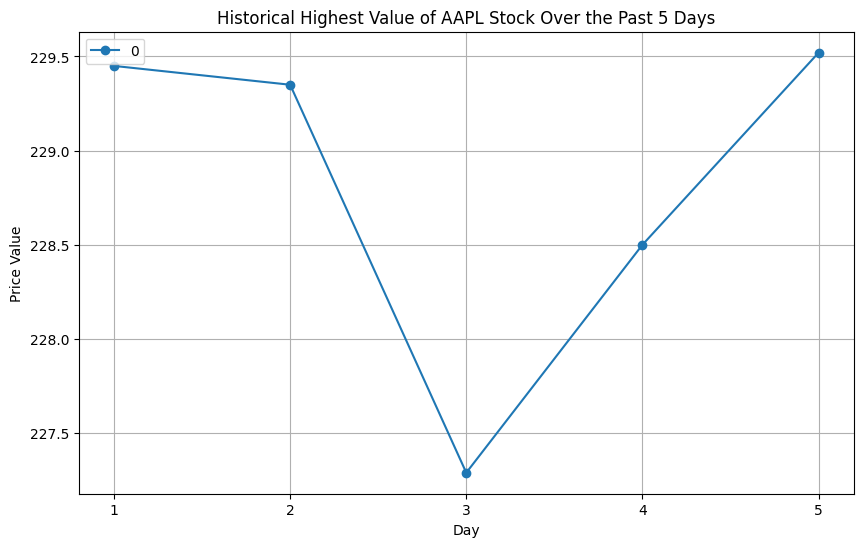

In [11]:
# Set index to start from 1 (for days 1-5)
df_bonus.index = range(1, len(df_bonus) + 1)

# Plot the data
df_bonus.plot(kind='line', figsize=(10, 6), marker='o')
plt.title(f"Historical Highest Value of {ticker_symbol} Stock Over the Past 5 Days")
plt.xlabel("Day")
plt.ylabel("Price Value")
plt.xticks(ticks=df_bonus.index)
plt.grid(True)
plt.show()